In [1]:
!pip install folium
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import geopy
import requests
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
import folium
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_html('https://gis-lab.info/qa/moscow-atd.html#.D0.A1.D0.BA.D0.B0.D1.87.D0.B0.D1.82.D1.8C_.D0.B4.D0.B0.D0.BD.D0.BD.D1.8B.D0.B5')[3]
df.head()

,№,Название,Административный округ,Тип мунобразования,Код ОКАТО,Код ОКТМО
0,1,Академический,ЮЗАО,Муниципальный округ,45293554,45397000
1,2,Алексеевский,СВАО,Муниципальный округ,45280552,45349000
2,3,Алтуфьевский,СВАО,Муниципальный округ,45280554,45350000
3,4,Арбат,ЦАО,Муниципальный округ,45286552,45374000
4,5,Аэропорт,САО,Муниципальный округ,45277553,45333000


In [3]:
df = df.drop(['№', 'Административный округ', "Тип мунобразования", "Код ОКАТО", "Код ОКТМО"], axis = 1)
df = df.rename({'Название': 'Name'}, axis = 1)
df

,Name
0,Академический
1,Алексеевский
2,Алтуфьевский
3,Арбат
4,Аэропорт
5,Бабушкинский
6,Басманный
7,Беговой
8,Бескудниковский
9,Бибирево


In [4]:
geolocator = Nominatim(user_agent="my_app")

In [5]:
coords = []
for name in df['Name']:
    location = geolocator.geocode(name)
    coords = coords + [[location.latitude, location.longitude]]
coords_pd = pd.DataFrame.from_records(coords)

In [6]:
df['temp'] = 1
coords_pd['temp'] = 1
df = pd.concat([df, coords_pd], axis=1)

In [7]:
df = df.drop('temp', axis = 1)
df = df.rename(columns={0: "latitude", 1: "longitude"})
df

,Name,latitude,longitude
0,Академический,57.711556,34.316485
1,Алексеевский,55.814878,37.650668
2,Алтуфьевский,55.880255,37.581635
3,Арбат,55.751199,37.589872
4,Аэропорт,55.800402,37.533156
5,Бабушкинский,55.865958,37.663894
6,Басманный,55.767281,37.669773
7,Беговой,55.781917,37.566300
8,Бескудниковский,55.863739,37.557322
9,Бибирево,55.883894,37.603577


In [8]:
#finding the coords for Moscow
address = 'Moscow'

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Moscow are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Moscow are 55.7504461, 37.6174943.


In [9]:
#building a map that focuses on Moscow, and then adding markers for each location in the main dataframe
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, district in zip(df['latitude'], df['longitude'], df['Name']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    #print(lat, lng, district)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_moscow)  
    
map_moscow

In [10]:
CLIENT_ID = 'REYSPD0AKQ13WFYH3ZW4YBPRCG4XMVB14ZHQNGAEB1KDIYWA' # your Foursquare ID
CLIENT_SECRET = 'PR15FYAQGGJWLURDYQYJNKNBT1M4NRGUJFWDPRG2LWSHKM3G' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: REYSPD0AKQ13WFYH3ZW4YBPRCG4XMVB14ZHQNGAEB1KDIYWA
CLIENT_SECRET:PR15FYAQGGJWLURDYQYJNKNBT1M4NRGUJFWDPRG2LWSHKM3G


In [11]:
#defining a function that gets nearby venues using Foursquare REST API
def getNearbyVenues(names, latitudes, longitudes, radius=1800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
#using the function defined above
moscow_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )


Академический
Алексеевский
Алтуфьевский
Арбат
Аэропорт
Бабушкинский
Басманный
Беговой
Бескудниковский
Бибирево
Бирюлёво Восточное
Бирюлёво Западное
Богородское
Братеево
Бутырский
Вешняки
Внуково
Войковский
Восточное Дегунино
Восточное Измайлово
Восточный
Выхино-Жулебино
Гагаринский
Головинский
Гольяново
Даниловский
Дмитровский
Донской
Дорогомилово
Замоскворечье
Западное Дегунино
Зюзино
Зябликово
Ивановское
Измайлово
Капотня
Коньково
Коптево
Косино-Ухтомский
Котловка
Красносельский
Крылатское
Крюково
Кузьминки
Кунцево
Куркино
Левобережный
Лефортово
Лианозово
Ломоносовский
Лосиноостровский
Люблино
Марфино
Марьина Роща
Марьино
Матушкино
Метрогородок
Мещанский
Митино
Можайский
Молжаниновский
Москворечье-Сабурово
Нагатино-Садовники
Нагатинский Затон
Нагорный
Некрасовка
Нижегородский
Ново-Переделкино
Новогиреево
Новокосино
Обручевский
Орехово-Борисово Северное
Орехово-Борисово Южное
Останкинский
Отрадное
Очаково-Матвеевское
Перово
Печатники
Покровское-Стрешнево
Преображенское
Пресненский
Про

In [19]:
moscow_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Академический,57.711556,34.316485,Банька🎊,57.710158,34.316704,Bath House
1,Академический,57.711556,34.316485,озеро с шершнями,57.711222,34.313109,Beach
2,Академический,57.711556,34.316485,Новый Магазин Заречье,57.715882,34.344131,Food & Drink Shop
3,Академический,57.711556,34.316485,Академическая,57.717349,34.344471,Train Station
4,Алексеевский,55.814878,37.650668,Чебуречная,55.816767,37.646840,Snack Place


In [20]:
moscow_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"""Мосрентген""",27,27,27,27,27,27
Академический,4,4,4,4,4,4
Алексеевский,100,100,100,100,100,100
Алтуфьевский,100,100,100,100,100,100
Арбат,100,100,100,100,100,100
Аэропорт,100,100,100,100,100,100
Бабушкинский,85,85,85,85,85,85
Басманный,100,100,100,100,100,100
Беговой,100,100,100,100,100,100


In [21]:
print('There are {} uniques categories.'.format(len(moscow_venues['Venue Category'].unique())))

There are 390 uniques categories.


In [22]:
#one hot encoding
moscow_onehot = pd.get_dummies(moscow_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
moscow_onehot['Neighborhood'] = moscow_venues['Neighborhood'] 

#move neighborhood column to the first column
fixed_columns = [moscow_onehot.columns[-1]] + list(moscow_onehot.columns[:-1])
moscow_onehot = moscow_onehot[fixed_columns]

moscow_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Алексеевский,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
moscow_onehot.shape

(8789, 391)

In [24]:
moscow_onehot

,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Академический,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Алексеевский,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Алексеевский,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Алексеевский,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Алексеевский,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Алексеевский,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Алексеевский,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
moscow_grouped = moscow_onehot.groupby('Neighborhood').mean().reset_index()
moscow_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"""Мосрентген""",0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Академический,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Алексеевский,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.020000,...,0.0,0.0,0.00,0.00,0.020000,0.000000,0.000000,0.020000,0.000000,0.000000
3,Алтуфьевский,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.010000,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000
4,Арбат,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.0,0.01,0.02,0.030000,0.000000,0.000000,0.040000,0.000000,0.000000
5,Аэропорт,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.010000,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
6,Бабушкинский,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.011765,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.011765,0.000000,0.000000
7,Басманный,0.000000,0.020000,0.00,0.0,0.0,0.0,0.000000,0.00,0.040000,...,0.0,0.0,0.00,0.01,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000
8,Беговой,0.000000,0.010000,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.0,0.00,0.01,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000
9,Бескудниковский,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
#defining a function that returns the top venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = moscow_grouped['Neighborhood']

for ind in np.arange(moscow_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(moscow_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"""Мосрентген""",Market,Auto Workshop,Gym / Fitness Center,Supermarket,Bus Stop,Miscellaneous Shop,Health Food Store,Health & Beauty Service,Gym Pool,Furniture / Home Store
1,Академический,Train Station,Bath House,Beach,Food & Drink Shop,Football Stadium,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food
2,Алексеевский,Park,Auto Workshop,Convenience Store,Coffee Shop,Photography Studio,Caucasian Restaurant,Other Repair Shop,Cosmetics Shop,Clothing Store,Dog Run
3,Алтуфьевский,Supermarket,Gym / Fitness Center,Pizza Place,Pet Store,Baby Store,Auto Workshop,Fast Food Restaurant,Salon / Barbershop,Convenience Store,Café
4,Арбат,Coffee Shop,Yoga Studio,Cocktail Bar,Russian Restaurant,Plaza,Hotel,Art Gallery,Seafood Restaurant,Restaurant,Concert Hall


In [28]:
moscow_grouped_clustering = moscow_grouped.drop('Neighborhood', 1)

Initialization complete
Iteration  0, inertia 9.885
Iteration  1, inertia 8.405
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
Iteration  0, inertia 11.031
Iteration  1, inertia 8.405
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
Iteration  0, inertia 10.050
Iteration  1, inertia 8.405
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
Iteration  0, inertia 9.666
Iteration  1, inertia 8.405
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
Iteration  0, inertia 12.468
Iteration  1, inertia 8.405
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
Iteration  0, inertia 10.169
Iteration  1, inertia 8.405
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete


Iteration 6, inertia 6.1349592639988835
start iteration
done sorting
end inner loop
Iteration 7, inertia 6.130922953728108
start iteration
done sorting
end inner loop
Iteration 8, inertia 6.126873130198554
start iteration
done sorting
end inner loop
Iteration 9, inertia 6.1184138102705505
start iteration
done sorting
end inner loop
Iteration 10, inertia 6.1142653023391045
start iteration
done sorting
end inner loop
Iteration 11, inertia 6.112356937304428
start iteration
done sorting
end inner loop
Iteration 12, inertia 6.110423001978837
start iteration
done sorting
end inner loop
Iteration 13, inertia 6.10966142095528
start iteration
done sorting
end inner loop
Iteration 14, inertia 6.10966142095528
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 6.771133012059171
start iteration
done sorting
end inner loop
Iteration 1, inertia 6.73479375605191
start iteration
done sorting
end inner loop
It

Iteration 3, inertia 5.412634878927704
start iteration
done sorting
end inner loop
Iteration 4, inertia 5.412634878927704
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 5.923791990648847
start iteration
done sorting
end inner loop
Iteration 1, inertia 5.551037027224098
start iteration
done sorting
end inner loop
Iteration 2, inertia 5.545942730628586
start iteration
done sorting
end inner loop
Iteration 3, inertia 5.545942730628586
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 5.443913042303674
start iteration
done sorting
end inner loop
Iteration 1, inertia 5.415848855804034
start iteration
done sorting
end inner loop
Iteration 2, inertia 5.415274759257034
start iteration
done sorting
end inner loop
Iteration 3, inertia 5.41480462665163
start iteration
done sorting
end inner loop
Iteration 4

Iteration 3, inertia 4.859599349101227
start iteration
done sorting
end inner loop
Iteration 4, inertia 4.859599349101227
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.922506005266883
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.823226189555594
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.70078691822213
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.59131202028109
start iteration
done sorting
end inner loop
Iteration 4, inertia 4.451834317160627
start iteration
done sorting
end inner loop
Iteration 5, inertia 4.444201589762769
start iteration
done sorting
end inner loop
Iteration 6, inertia 4.444201589762769
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.985391423133161
start iteration
done sorting
end inner loop
Iteration 1,

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.2967887824055735
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.267357462494795
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.262421583856126
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.261129310145637
start iteration
done sorting
end inner loop
Iteration 4, inertia 4.261129310145637
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.160799165522699
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.043222050503073
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.008126488168585
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.008126488168585
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.2

Iteration 9, inertia 3.7998316592889974
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.9201420052451117
start iteration
done sorting
end inner loop
Iteration 1, inertia 3.8684302539849176
start iteration
done sorting
end inner loop
Iteration 2, inertia 3.8530029679876874
start iteration
done sorting
end inner loop
Iteration 3, inertia 3.8365298816649336
start iteration
done sorting
end inner loop
Iteration 4, inertia 3.831778892937614
start iteration
done sorting
end inner loop
Iteration 5, inertia 3.82700411025782
start iteration
done sorting
end inner loop
Iteration 6, inertia 3.8251133292872463
start iteration
done sorting
end inner loop
Iteration 7, inertia 3.8239516065885604
start iteration
done sorting
end inner loop
Iteration 8, inertia 3.8239516065885604
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Ite

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.6232697552077
start iteration
done sorting
end inner loop
Iteration 1, inertia 3.286310906849033
start iteration
done sorting
end inner loop
Iteration 2, inertia 3.1723111835750584
start iteration
done sorting
end inner loop
Iteration 3, inertia 3.1627988520685637
start iteration
done sorting
end inner loop
Iteration 4, inertia 3.158686641110732
start iteration
done sorting
end inner loop
Iteration 5, inertia 3.158686641110732
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.0084820811023665
start iteration
done sorting
end inner loop
Iteration 1, inertia 3.6296841126483166
start iteration
done sorting
end inner loop
Iteration 2, inertia 3.487936883100189
start iteration
done sorting
end inner loop
Iteration 3, inertia 3.487936883100189
center shift 0.000000e+00 within tolerance 1.657729e-08
Initiali

Iteration 5, inertia 3.075914149670417
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.952235098999337
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.8768419070534796
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.8617263836370315
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.8580661168031036
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.8580661168031036
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.3897677014734517
start iteration
done sorting
end inner loop
Iteration 1, inertia 3.1554537381465533
start iteration
done sorting
end inner loop
Iteration 2, inertia 3.137886561883076
start iteration
done sorting
end inner loop
Iteration 3, inertia 3.1252378090908155
start iteration
done sorting
end inner loop
Ite

start iteration
done sorting
end inner loop
Iteration 0, inertia 2.7764649907950116
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.7469337043351723
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.7272031633591265
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.715098218442542
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.7096528035310063
start iteration
done sorting
end inner loop
Iteration 5, inertia 2.7044645835931274
start iteration
done sorting
end inner loop
Iteration 6, inertia 2.6977574962777786
start iteration
done sorting
end inner loop
Iteration 7, inertia 2.695609740286387
start iteration
done sorting
end inner loop
Iteration 8, inertia 2.6939791725504807
start iteration
done sorting
end inner loop
Iteration 9, inertia 2.69077201536852
start iteration
done sorting
end inner loop
Iteration 10, inertia 2.673914757364953
start iteration
done sorting
end inner loop
Iteration 11, inertia 2.666193897724

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.8220661762910284
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.610168054575273
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.5984358501228817
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.5890608415532896
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.583638449944881
start iteration
done sorting
end inner loop
Iteration 5, inertia 2.5774058458891935
start iteration
done sorting
end inner loop
Iteration 6, inertia 2.5702513276267003
start iteration
done sorting
end inner loop
Iteration 7, inertia 2.544083812073014
start iteration
done sorting
end inner loop
Iteration 8, inertia 2.4698540845432744
start iteration
done sorting
end inner loop
Iteration 9, inertia 2.4698540845432744
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, in

done sorting
end inner loop
Iteration 2, inertia 2.371110783594974
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.366656820460106
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.366656820460106
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.2143424554769546
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.194095779355581
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.1917678129546125
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.1884371269507636
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.186966605469451
start iteration
done sorting
end inner loop
Iteration 5, inertia 2.1862871267598876
start iteration
done sorting
end inner loop
Iteration 6, inertia 2.1862871267598876
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done 

Iteration 1, inertia 2.1261302612458897
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.1158892230688187
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.112933063560122
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.1103565369317723
start iteration
done sorting
end inner loop
Iteration 5, inertia 2.1064587394260696
start iteration
done sorting
end inner loop
Iteration 6, inertia 2.1064587394260696
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.127426132459542
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.086177866930465
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.066242657446753
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.0428129638256545
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.0428129638256545
center shift 0.000000e+00 within tolerance 1

Iteration 2, inertia 2.0807830048565306
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.9785049107933472
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.9785049107933472
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.0334532841968493
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.9822598552211341
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.9332369175783617
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.9120440477633192
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.9092054336580606
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.906515313510038
start iteration
done sorting
end inner loop
Iteration 6, inertia 1.9038064789747788
start iteration
done sorting
end inner loop
Iteration 7, inertia 1.897964173756626
start iteration
done sorting
end inner loo

Iteration 1, inertia 2.059848449753727
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.0449615765949023
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.0388672962943213
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.0240678379816748
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.903409961241799
start iteration
done sorting
end inner loop
Iteration 6, inertia 1.903409961241799
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.9904756574125002
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.9239309578039117
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.9220204085452115
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.9166727514709765
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.9081681375401076
start iteration
done sorting
end inner loop

center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.7591479149235627
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.7362365270540385
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.7346737314851934
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.7346737314851934
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.9354356754747946
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.908274176705499
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.8641872456881283
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.8427225532544071
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.8427225532544071
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start

Iteration 1, inertia 1.7126403667747934
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.679880689111452
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.6681821267860273
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.6549808276299594
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.6360972699759726
start iteration
done sorting
end inner loop
Iteration 6, inertia 1.6344748945645926
start iteration
done sorting
end inner loop
Iteration 7, inertia 1.6344748945645926
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.737192290684971
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.6743223399325944
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.665724831634059
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.6606779243809444
start iteration
done sorting
end inner loop

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.6651540410878645
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.6377158113577035
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.6377158113577035
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.6360245180206532
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.5931883177528736
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.573739359751242
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.5717813633632005
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.5706698766086211
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.5669583809079866
start iteration
done sorting
end inner loop
Iteration 6, inertia 1.5656134264026034
start iteration
done sorting
end inner loop
Iteration 7, 

Iteration 6, inertia 1.5234897324709384
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.5119634412201
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.457920283555543
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.451166310478146
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.451166310478146
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.5033256085050506
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.4849065555356273
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.4838262900400754
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.48224258182736
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.48224258182736
center shift 0.000000e+00 within tolerance 1.657729e-0

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.4459004727595548
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.425954779588831
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.4217872615269465
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.4217872615269465
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.3790189614506634
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.3542117374871185
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.3471124114864153
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.3450890582834492
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.3450890582834492
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, iner

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.3227365504905262
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.2945531196204134
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.292273758016101
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.292273758016101
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.4142582114597413
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.384844707049695
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.3739414965829142
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.3739414965829142
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.3332275701475025
start iteration
done sorting
end inner loop
Iteration 1, inerti

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.292549444078309
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.2720286749600984
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.2633482880965758
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.2585870242256922
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.256230120613612
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.256230120613612
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.3002113589920705
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.2775233228067753
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.2752722602128344
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.2752722602128344
center shift 0.000000e+00 within tolerance 1.657729e-08
Ini

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.2010712687898806
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.164625599786254
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.1604621061349392
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.1604621061349392
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.2044622977211092
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.1795070458381256
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.1795070458381256
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.175848788434837
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.160413213045661
start iteration
done sorting
end inner loop
Iteration 2, inerti

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.1272830390293338
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.1091059732750888
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.1018562248024595
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.1018562248024595
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.0991994658285054
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.0802392894829123
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.0774533749867417
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.0774533749867417
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.1476133082878368
start iteration
done sorting
end inner loop
Iteration 1, ine

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.085578101294861
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.071692043520962
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.0686479342690967
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.0686479342690967
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.0309575771934512
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.0182320143645442
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.0182320143645442
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.0390187290007435
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.0364735913998349
start iteration
done sorting
end inner loop
Iteration 2, inert

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.0189164894083134
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.0019493220873352
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.9963115209299472
start iteration
done sorting
end inner loop
Iteration 3, inertia 0.9963115209299472
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.9748527256181881
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.9703705670568338
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.966092474966756
start iteration
done sorting
end inner loop
Iteration 3, inertia 0.966092474966756
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.9946992436358877
start iteration
done sorting
end inner loop
Iteration 1, inert

done sorting
end inner loop
Iteration 2, inertia 0.9240766396202549
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.9023992225919837
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.9023992225919837
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.9081936811287338
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.9050382189579174
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.9050382189579174
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.945944712122899
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.9392616333466424
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.9392616333466424
center shift 0.000000

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.8993177682911996
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.8993177682911996
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.8528908389967601
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.8476556413227015
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.8476556413227015
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.877368998232326
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.8623262062816005
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.8623262062816005
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.801804239479894
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.801804239479894
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.7925455214286644
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.7896363911758298
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.7896363911758298
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.8086708728141114
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.8086708728141114
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.8068899298916049
start iteration
done sorting
end inner loop
Iteration 1, inertia 0

Iteration 1, inertia 0.7881001901135313
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.7702979000633828
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.7631393172290762
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.7631393172290762
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.779781256843658
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.779781256843658
center shift 0.000000e+00 within tolerance 1.657729e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.7843841611569363
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.7783232072335607
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.7783232072335607
center shift 0.000000e+00 within tolerance 1.65772

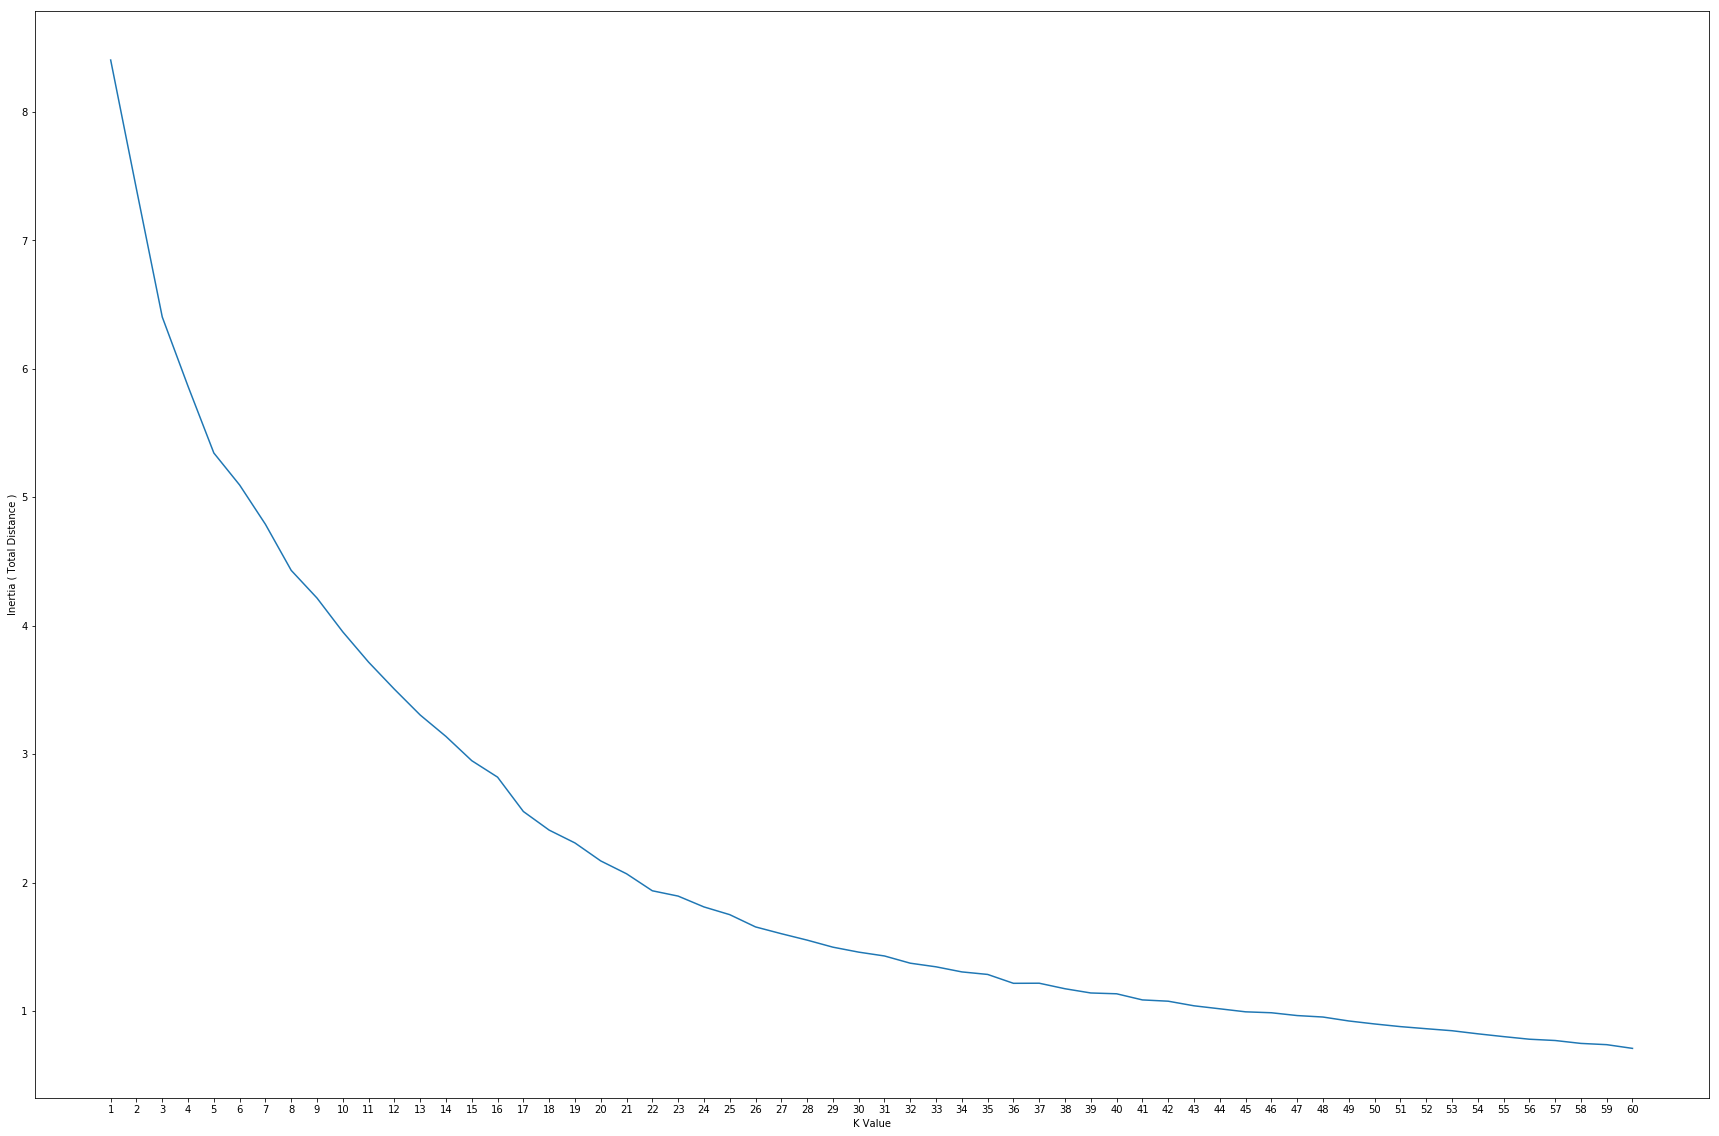

In [29]:
def cluster_variance(n):
    variances=[]
    kmeans=[]
    outputs=[]
    K=[i for i in range(1,n+1)]
    for i in range(1,n+1):
        variance=0
        model=KMeans(n_clusters=i,random_state=82,verbose=2).fit(moscow_grouped_clustering)
        kmeans.append(model)
        variances.append(model.inertia_)
        
    return variances,K,n
variances,K,n=cluster_variance(60)
plt.figure(figsize=(30,20))
plt.plot(K,variances)
plt.ylabel("Inertia ( Total Distance )")
plt.xlabel("K Value")
plt.xticks([i for i in range(1,n+1)])
plt.show()

In [30]:
# set number of clusters
kclusters = 36

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(moscow_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([34, 13, 29, 25, 21, 29, 17, 21, 21, 20], dtype=int32)

In [31]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [32]:
moscow_merged = df

# merge moscow_grouped with moscow_data to add latitude/longitude for each neighborhood
moscow_merged = moscow_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

moscow_merged.head() # check the last columns!

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Академический,57.711556,34.316485,13.0,Train Station,Bath House,Beach,Food & Drink Shop,Football Stadium,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food
1,Алексеевский,55.814878,37.650668,29.0,Park,Auto Workshop,Convenience Store,Coffee Shop,Photography Studio,Caucasian Restaurant,Other Repair Shop,Cosmetics Shop,Clothing Store,Dog Run
2,Алтуфьевский,55.880255,37.581635,25.0,Supermarket,Gym / Fitness Center,Pizza Place,Pet Store,Baby Store,Auto Workshop,Fast Food Restaurant,Salon / Barbershop,Convenience Store,Café
3,Арбат,55.751199,37.589872,21.0,Coffee Shop,Yoga Studio,Cocktail Bar,Russian Restaurant,Plaza,Hotel,Art Gallery,Seafood Restaurant,Restaurant,Concert Hall
4,Аэропорт,55.800402,37.533156,29.0,Coffee Shop,Park,Cosmetics Shop,Pet Store,Gourmet Shop,Martial Arts Dojo,Italian Restaurant,Beer Bar,Health Food Store,Spa


In [33]:
moscow_merged = moscow_merged[moscow_merged['Cluster Labels'].notna()]

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(moscow_merged['latitude'], moscow_merged['longitude'], moscow_merged['Name'], moscow_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
moscow_merged.head()

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Академический,57.711556,34.316485,13.0,Train Station,Bath House,Beach,Food & Drink Shop,Football Stadium,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food
1,Алексеевский,55.814878,37.650668,29.0,Park,Auto Workshop,Convenience Store,Coffee Shop,Photography Studio,Caucasian Restaurant,Other Repair Shop,Cosmetics Shop,Clothing Store,Dog Run
2,Алтуфьевский,55.880255,37.581635,25.0,Supermarket,Gym / Fitness Center,Pizza Place,Pet Store,Baby Store,Auto Workshop,Fast Food Restaurant,Salon / Barbershop,Convenience Store,Café
3,Арбат,55.751199,37.589872,21.0,Coffee Shop,Yoga Studio,Cocktail Bar,Russian Restaurant,Plaza,Hotel,Art Gallery,Seafood Restaurant,Restaurant,Concert Hall
4,Аэропорт,55.800402,37.533156,29.0,Coffee Shop,Park,Cosmetics Shop,Pet Store,Gourmet Shop,Martial Arts Dojo,Italian Restaurant,Beer Bar,Health Food Store,Spa


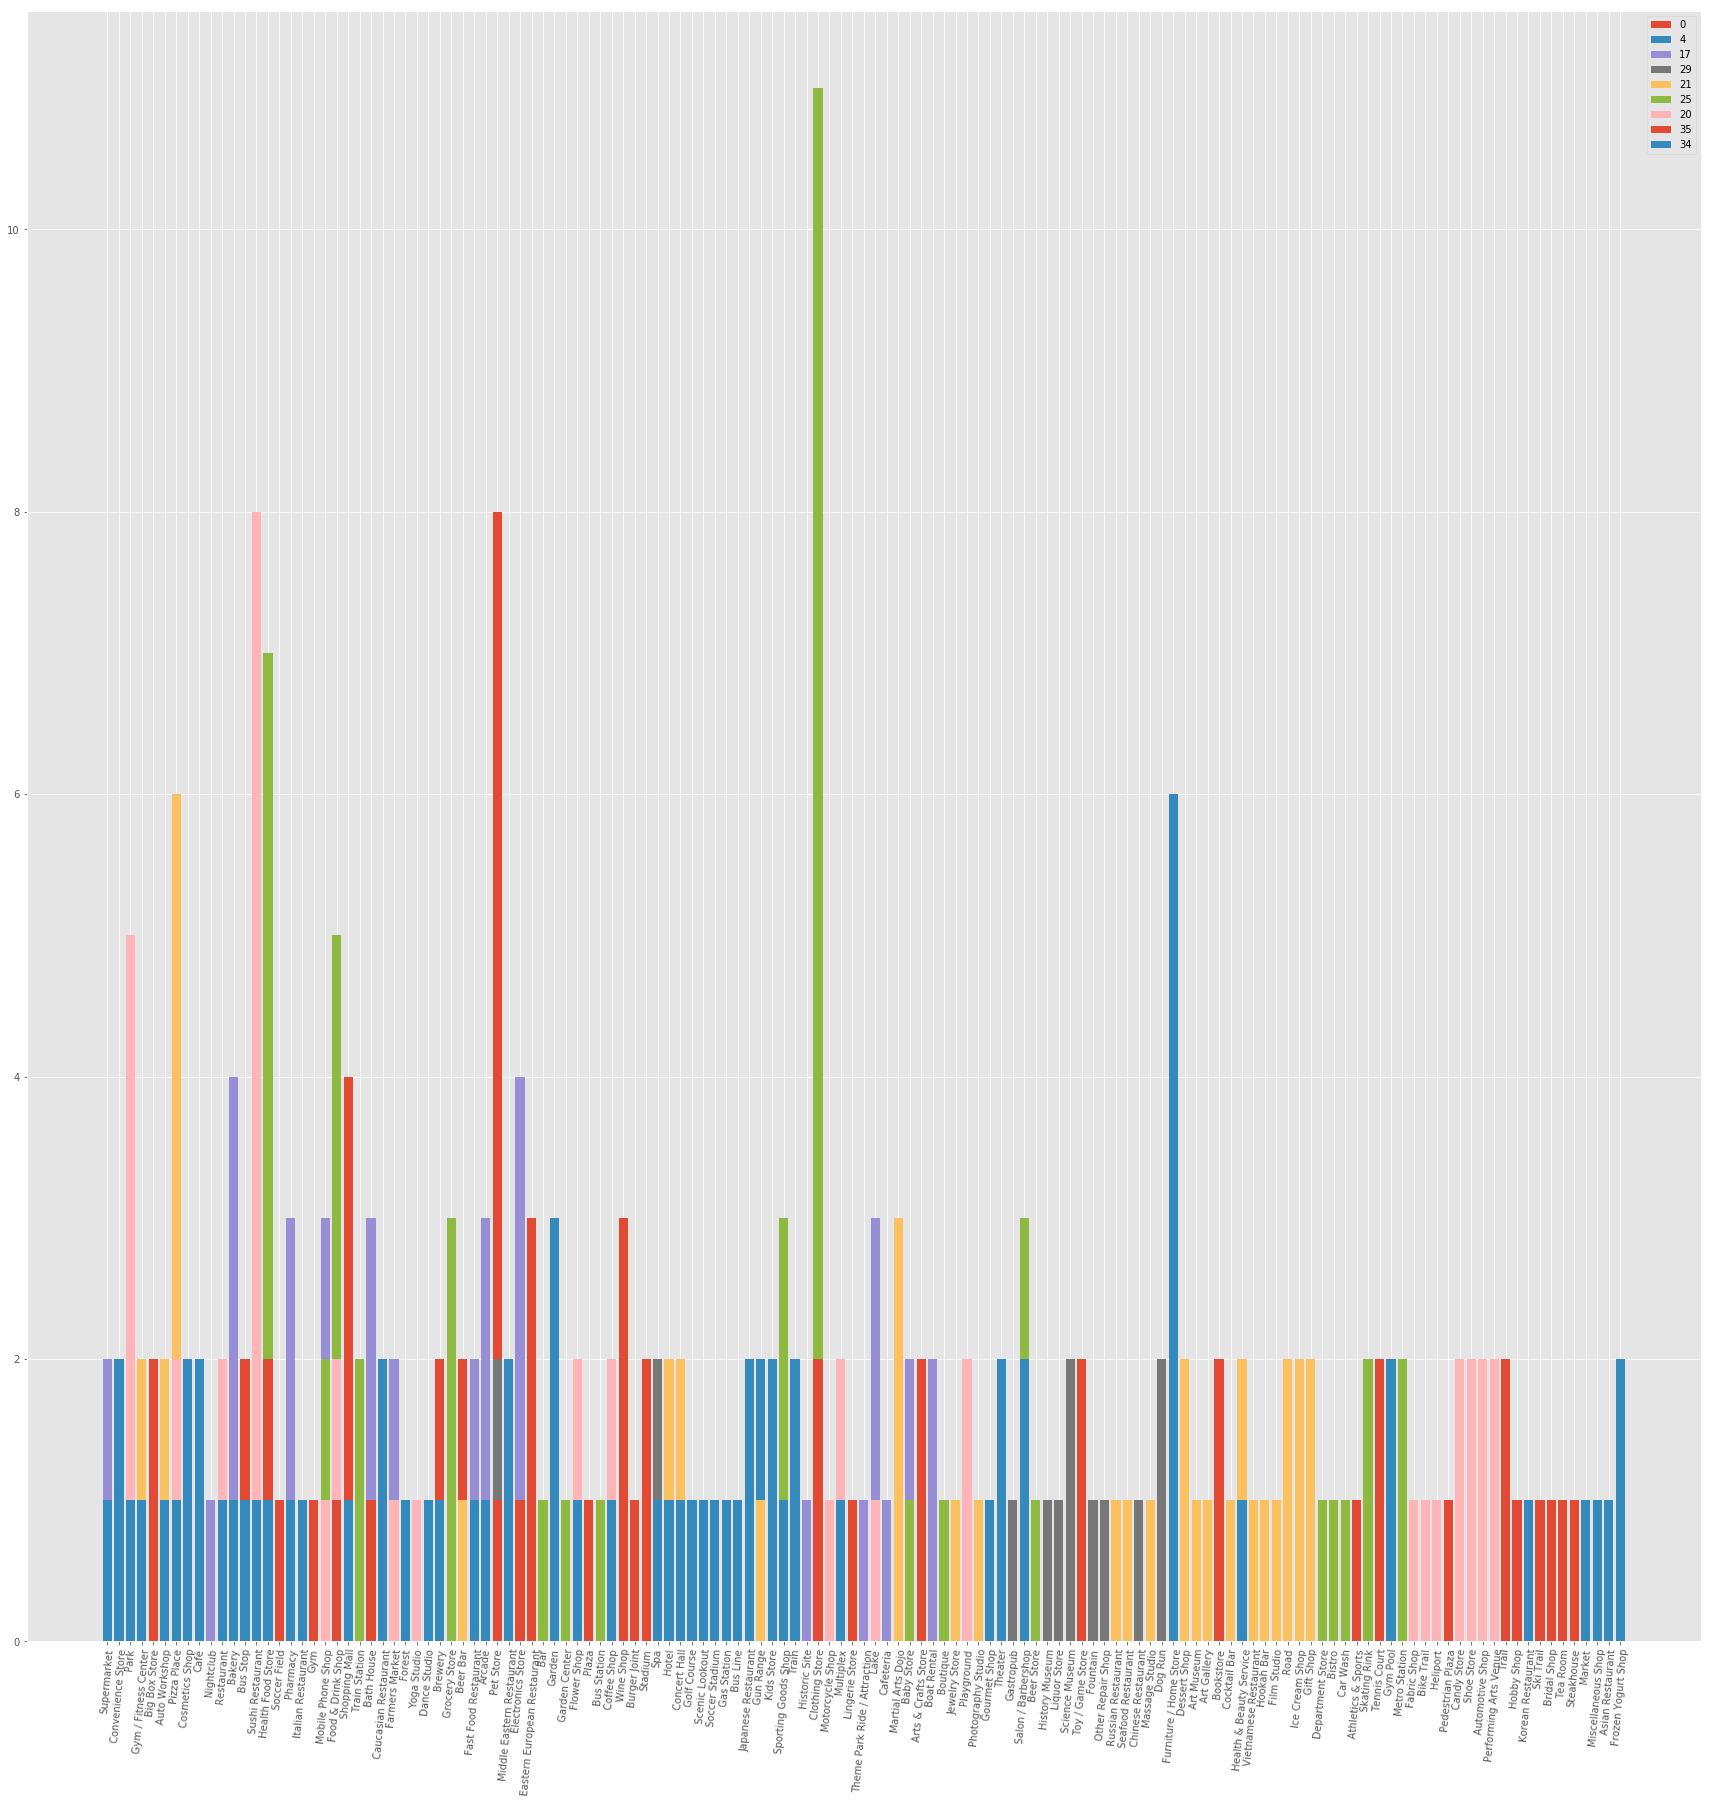

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(30,30))
for i in [0, 4, 17, 29, 21, 25, 20, 35, 34]:  
    temp = moscow_merged.loc[moscow_merged['Cluster Labels'] == i, moscow_merged.columns[list(range(4, moscow_merged.shape[1]))]]
    frames = [temp['1st Most Common Venue'].value_counts(), temp['2nd Most Common Venue'].value_counts(), temp['3rd Most Common Venue'].value_counts(), temp['4th Most Common Venue'].value_counts(), temp['5th Most Common Venue'].value_counts(),
             temp['6th Most Common Venue'].value_counts(), temp['7th Most Common Venue'].value_counts(), temp['8th Most Common Venue'].value_counts(), temp['9th Most Common Venue'].value_counts(), temp['10th Most Common Venue'].value_counts()] 
    temp = pd.concat(frames)
    temp = pd.DataFrame(temp)
    temp = pd.DataFrame(np.sort(temp.values, axis=0), index=temp.index, columns=temp.columns)
    #temp.plot.bar(figsize=(30,20)).invert_xaxis()
    #plt.bar(temp[0], temp, align='edge', width=-0.3, label='count1')

    plt.bar(temp.index, (temp[0]), label=i)
    plt.xticks(rotation=85)
    plt.legend()

plt.show()

#plt.legend()

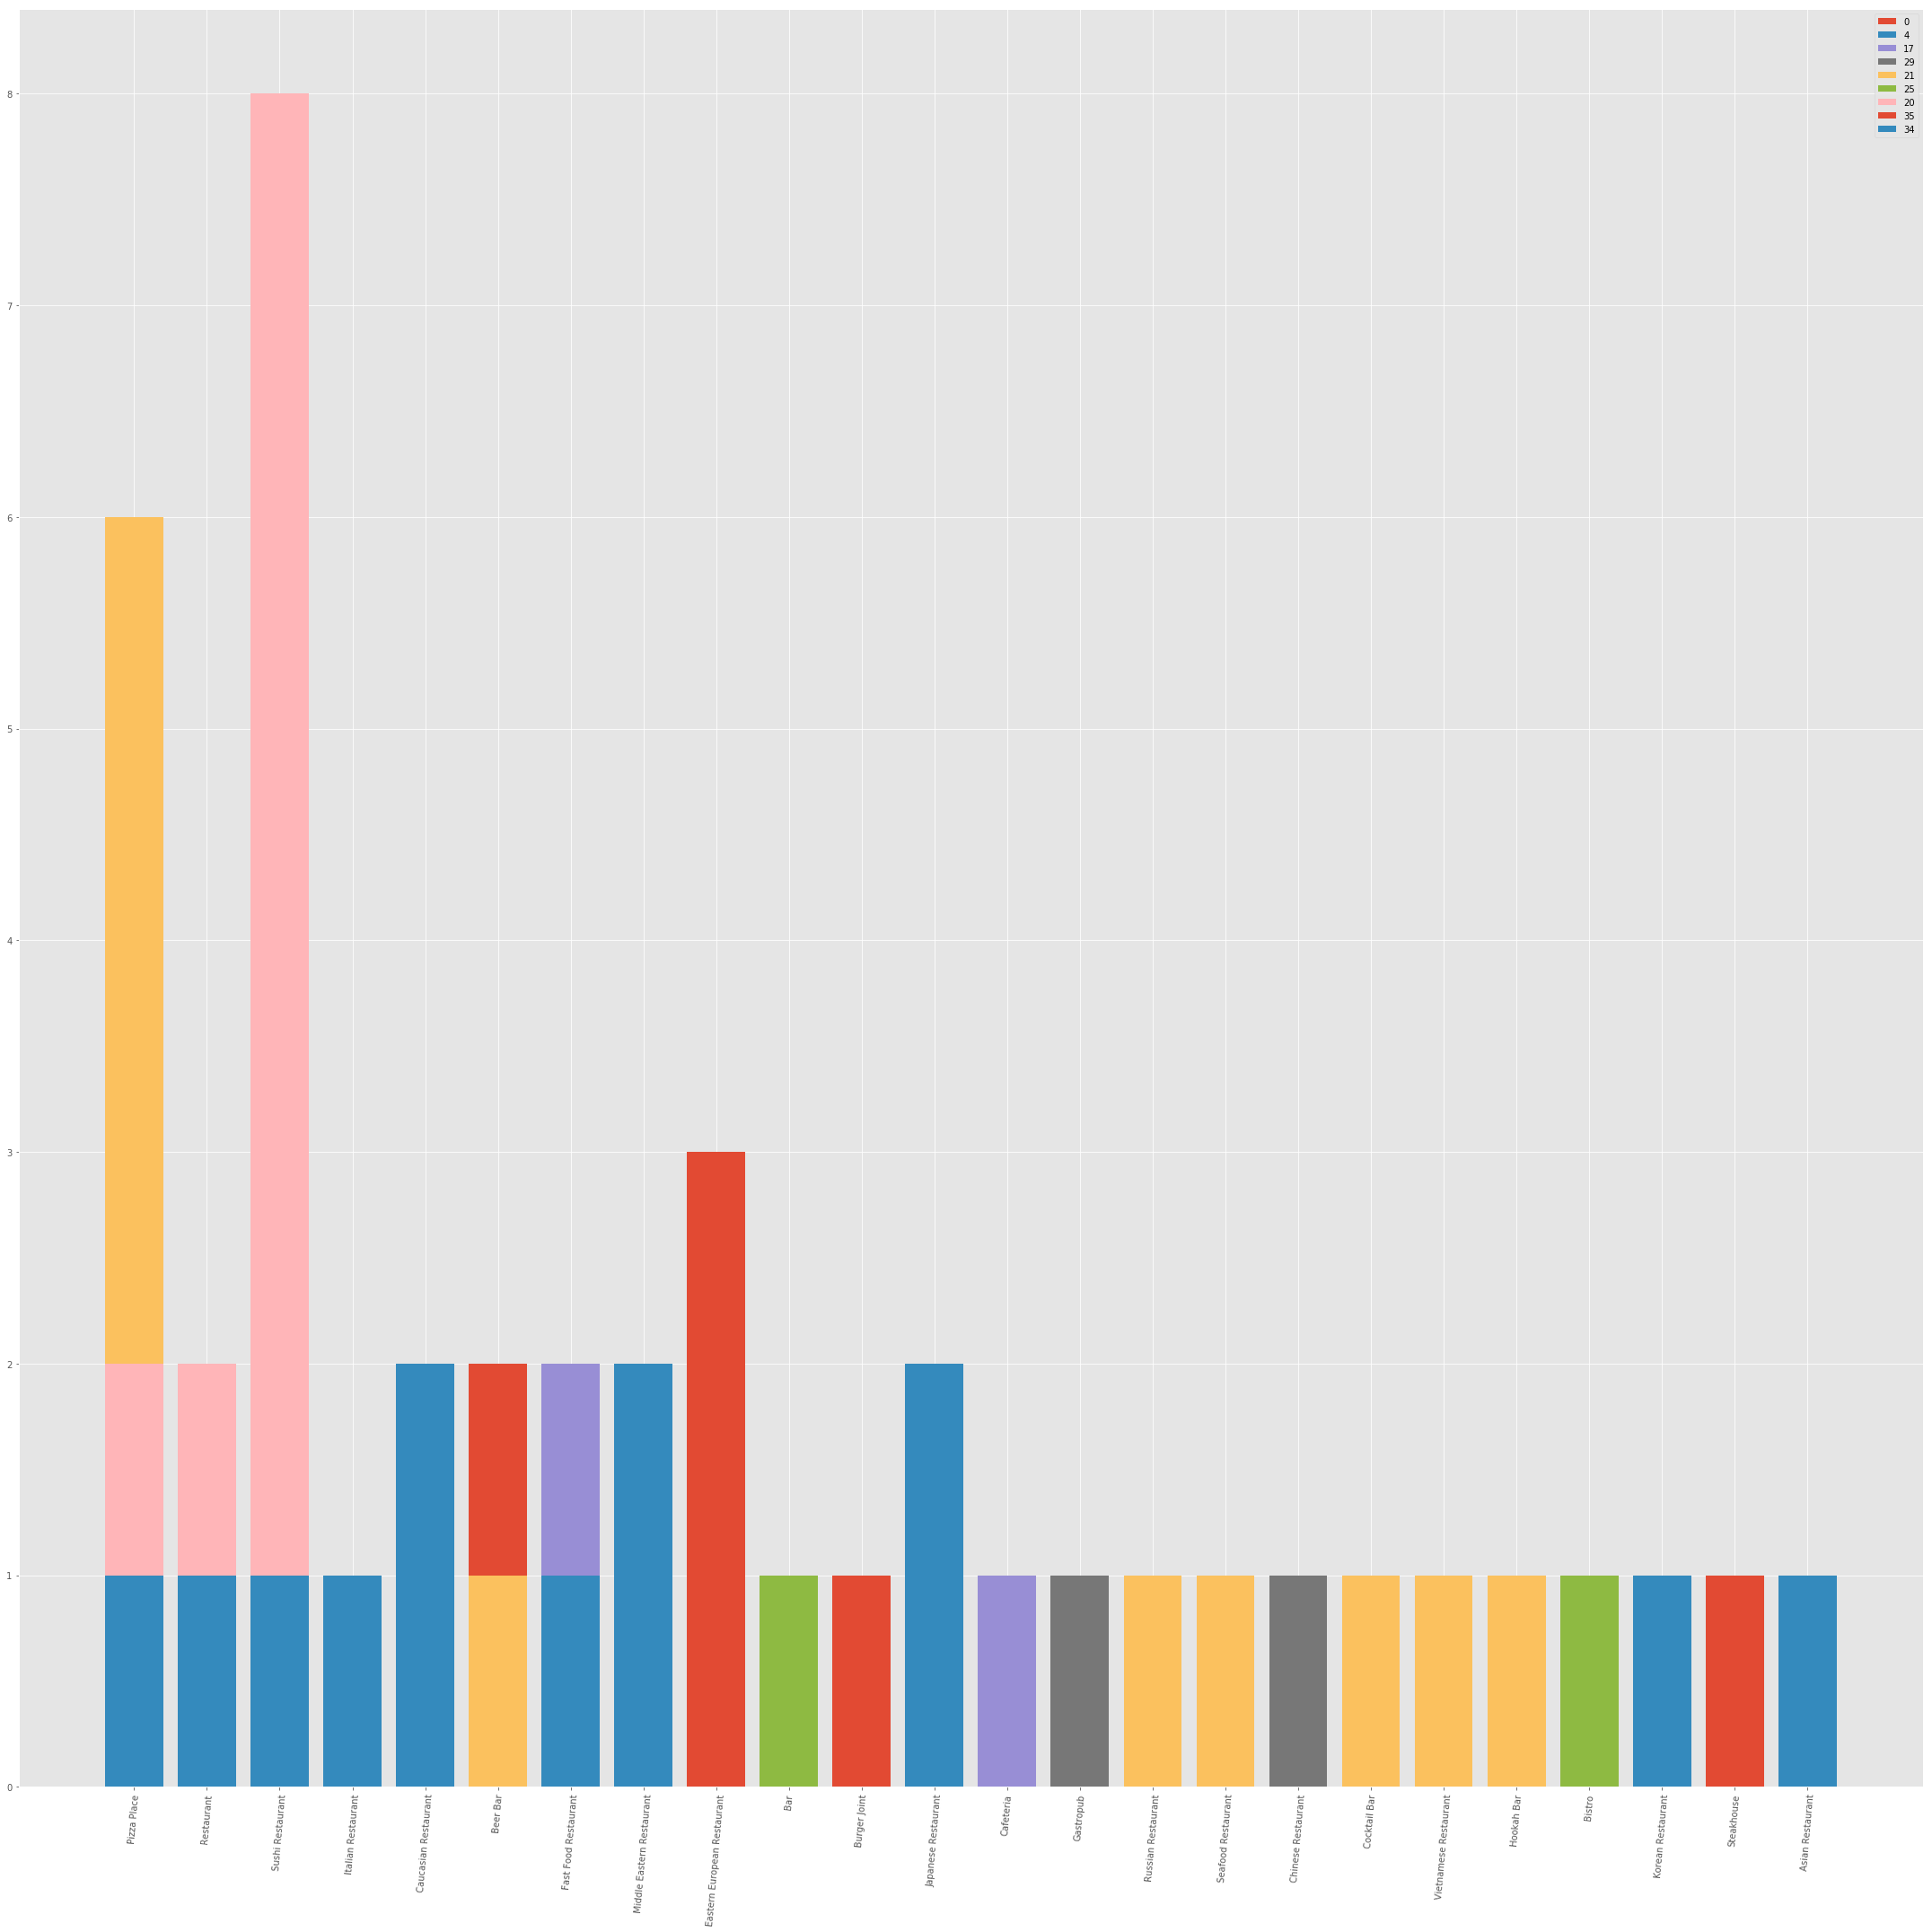

{0: 14, 4: 19, 17: 18, 29: 21, 21: 23, 25: 26, 20: 22, 35: 15, 34: 18}

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(30,30))
values = {}
for i in [0, 4, 17, 29, 21, 25, 20, 35, 34]:  
    temp = moscow_merged.loc[moscow_merged['Cluster Labels'] == i, moscow_merged.columns[list(range(4, moscow_merged.shape[1]))]]
    frames = [temp['1st Most Common Venue'].value_counts(), temp['2nd Most Common Venue'].value_counts(), temp['3rd Most Common Venue'].value_counts(), temp['4th Most Common Venue'].value_counts(), temp['5th Most Common Venue'].value_counts(),
             temp['6th Most Common Venue'].value_counts(), temp['7th Most Common Venue'].value_counts(), temp['8th Most Common Venue'].value_counts(), temp['9th Most Common Venue'].value_counts(), temp['10th Most Common Venue'].value_counts()] 
    temp = pd.concat(frames)
    temp = pd.DataFrame(temp)
    temp = pd.DataFrame(np.sort(temp.values, axis=0), index=temp.index, columns=temp.columns)
    #temp.plot.bar(figsize=(30,20)).invert_xaxis()
    #plt.bar(temp[0], temp, align='edge', width=-0.3, label='count1')
    a = ['Pizza Place' , 'Restaurant', 'Cafe', 'Sushi Restaurant', 'Italian Restaurant', 'Caucasian Restaurant', 'Fast Food Restaurant', 'Beer Bar', 'Middle Eastern Restaurant', 'Eastern European Restaurant',
        'Bar', 'Burger Joint', 'Japanese Restaurant', 'Cafeteria', 'Gastropub', 'Russian Restaurant', 'Seafood Restaurant', 'Chinese Restaurant', 'Cocktail Bar', 'Hookah Bar', 'Vietnamese Restaurant', 'Bistro',
        'Korean Restaurant', 'Steakhouse', 'Asian Restaurant']
    #temp = temp[temp[any(x in a for x in temp.index.values)]]
    for b in temp.index:
        if b not in a:
            #print('NF')
            try:
                temp = temp.drop(b, axis = 0)
            except:
                continue
    values[i] = temp.sum(axis = 0).iloc[0]
    plt.bar(temp.index, (temp[0]), label=i)
    plt.xticks(rotation=85)
    plt.legend()
plt.tight_layout()
plt.show()
values
#plt.legend()

0 --------- 9
4 --------- 10
17 --------- 13
29 --------- 13
21 --------- 10
25 --------- 13
20 --------- 11
35 --------- 10
34 --------- 9


Text(0, 0.5, 'Weighted amount of restaurants')

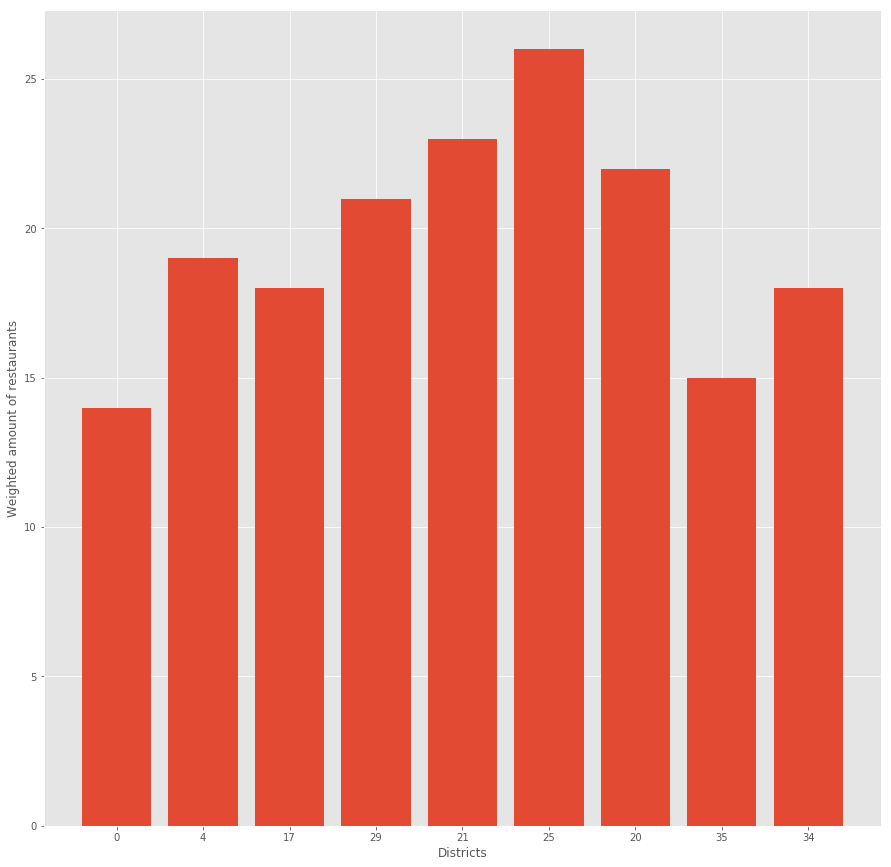

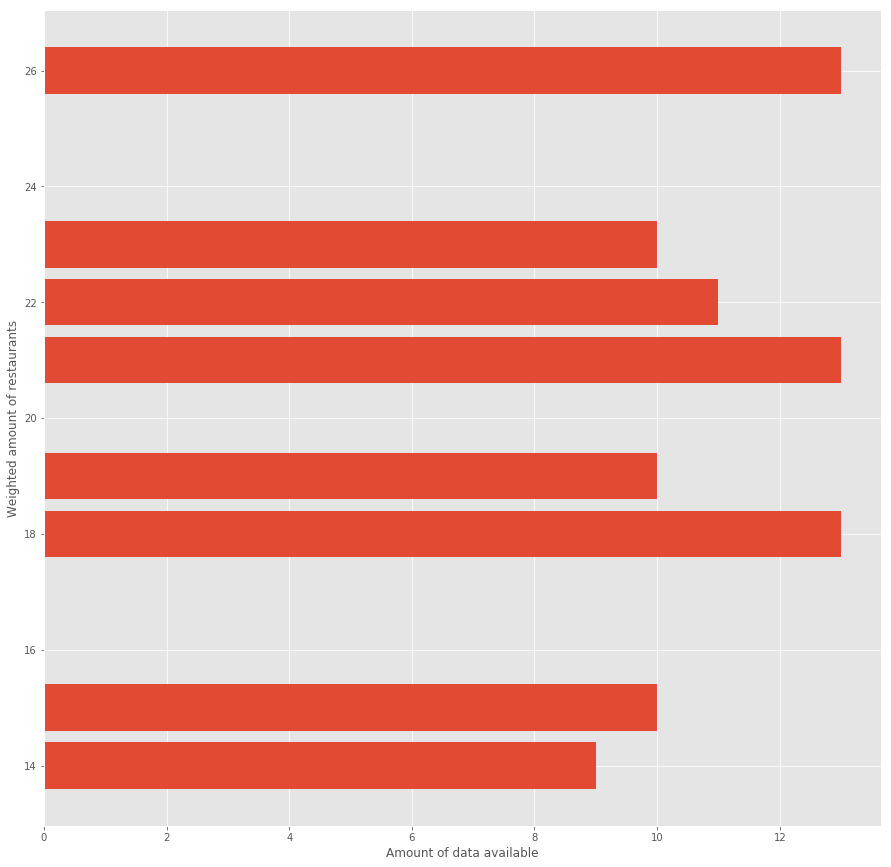

In [38]:
plt.figure(figsize=(15,15))
plt.bar(range(len(values)), list(values.values()), align='center')
plt.xticks(range(len(values)), list(values.keys()))
plt.xlabel('Districts')
plt.ylabel('Weighted amount of restaurants')
t_list = []
for i in [0, 4, 17, 29, 21, 25, 20, 35, 34]:  
    print(i, '---------', moscow_merged.loc[moscow_merged['Cluster Labels'] == i, moscow_merged.columns[list(range(4, moscow_merged.shape[1]))]].shape[0])
    t_list.append(moscow_merged.loc[moscow_merged['Cluster Labels'] == i, moscow_merged.columns[list(range(4, moscow_merged.shape[1]))]].shape[0])
thr = plt.figure(figsize=(15,15))
plt.barh(list(values.values()), t_list)
plt.xlabel('Amount of data available')
plt.ylabel('Weighted amount of restaurants')

In [39]:
moscow_merged.loc[moscow_merged['Cluster Labels'] == 35, moscow_merged.columns[[0] + list(range(4, moscow_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,Лефортово,Park,Gym / Fitness Center,Café,Coffee Shop,Dance Studio,Cosmetics Shop,Bath House,Bridal Shop,Tea Room,Stadium
71,Орехово-Борисово Северное,Coffee Shop,Clothing Store,Gym / Fitness Center,Electronics Store,Cosmetics Shop,Caucasian Restaurant,Garden,Park,Restaurant,Eastern European Restaurant
83,Ростокино,Clothing Store,Gym / Fitness Center,Food & Drink Shop,Cosmetics Shop,Arcade,Lingerie Store,Theater,Park,Arts & Crafts Store,Bus Stop
85,Савёлки,Café,Park,Soccer Field,Gym,Supermarket,Burger Joint,Plaza,Ski Trail,Tennis Court,Trail
91,Северное Тушино,Café,Park,Coffee Shop,Pet Store,Health Food Store,Gym / Fitness Center,Cosmetics Shop,Clothing Store,Gym,Wine Shop
106,Филёвский Парк,Electronics Store,Trail,Middle Eastern Restaurant,Cosmetics Shop,Hobby Shop,Pedestrian Plaza,Café,Gym / Fitness Center,Gym,Clothing Store
107,Фили-Давыдково,Park,Café,Gym,Middle Eastern Restaurant,Auto Workshop,Shopping Mall,Athletics & Sports,Food & Drink Shop,Health Food Store,Clothing Store
113,Черёмушки,Café,Gym / Fitness Center,Park,Restaurant,Korean Restaurant,Bakery,Cosmetics Shop,Caucasian Restaurant,Coffee Shop,Bookstore
115,Чертаново Центральное,Clothing Store,Gym / Fitness Center,Cosmetics Shop,Coffee Shop,Middle Eastern Restaurant,Sporting Goods Shop,Supermarket,Sushi Restaurant,Steakhouse,Toy / Game Store
120,Южное Тушино,Pizza Place,Park,Café,Supermarket,Convenience Store,Coffee Shop,Pharmacy,Cosmetics Shop,Wine Shop,Shopping Mall


0 --------- 9
17 --------- 13
25 --------- 13


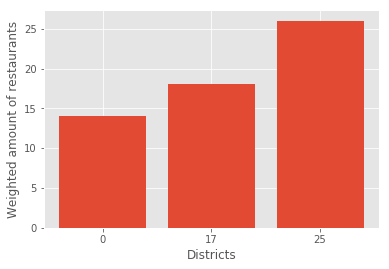

In [40]:
new_values = {}
new_values[0] = values[0]
new_values[17] = values[17]
new_values[25] = values[25]
plt.bar(range(len(new_values)), list(new_values.values()), align='center')
plt.xticks(range(len(new_values)), list(new_values.keys()))
plt.xlabel('Districts')
plt.ylabel('Weighted amount of restaurants')
t_list = []
for i in [0, 17, 25]:  
    print(i, '---------', moscow_merged.loc[moscow_merged['Cluster Labels'] == i, moscow_merged.columns[list(range(4, moscow_merged.shape[1]))]].shape[0])
    t_list.append(moscow_merged.loc[moscow_merged['Cluster Labels'] == i, moscow_merged.columns[list(range(4, moscow_merged.shape[1]))]].shape[0])

In [41]:
moscow_merged.loc[moscow_merged['Cluster Labels'] == 17, moscow_merged.columns[[0] + list(range(4, moscow_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Бабушкинский,Park,Gym,Gym / Fitness Center,Coffee Shop,Cosmetics Shop,Grocery Store,Caucasian Restaurant,Health Food Store,Supermarket,Convenience Store
15,Вешняки,Historic Site,Supermarket,Fast Food Restaurant,Gym / Fitness Center,Coffee Shop,Lake,Park,Pet Store,Farmers Market,Bus Stop
23,Головинский,Supermarket,Gym / Fitness Center,Auto Workshop,Park,Coffee Shop,Cosmetics Shop,Health Food Store,Convenience Store,Pet Store,Café
42,Крюково,Coffee Shop,Fast Food Restaurant,Supermarket,Pizza Place,Park,Nightclub,Electronics Store,Cosmetics Shop,Sporting Goods Shop,Pharmacy
59,Можайский,Auto Workshop,Park,Convenience Store,Supermarket,Motorcycle Shop,Sporting Goods Shop,Cafeteria,Japanese Restaurant,Martial Arts Dojo,Bath House
68,Новогиреево,Cosmetics Shop,Park,Gym / Fitness Center,Mobile Phone Shop,Fast Food Restaurant,Historic Site,Coffee Shop,Health Food Store,Pizza Place,Bakery
69,Новокосино,Fast Food Restaurant,Café,Coffee Shop,Shopping Mall,Pizza Place,Cosmetics Shop,Sporting Goods Shop,Sushi Restaurant,Restaurant,Lake
87,Свиблово,Park,Clothing Store,Convenience Store,Gym,Gym / Fitness Center,Lingerie Store,Health Food Store,Cosmetics Shop,Arts & Crafts Store,Mobile Phone Shop
88,Северное Бутово,Park,Supermarket,Coffee Shop,Auto Workshop,Middle Eastern Restaurant,Multiplex,Kids Store,Café,Baby Store,Arcade
90,Северное Медведково,Park,Supermarket,Coffee Shop,Pharmacy,Auto Workshop,Restaurant,Grocery Store,Multiplex,Cosmetics Shop,Fast Food Restaurant


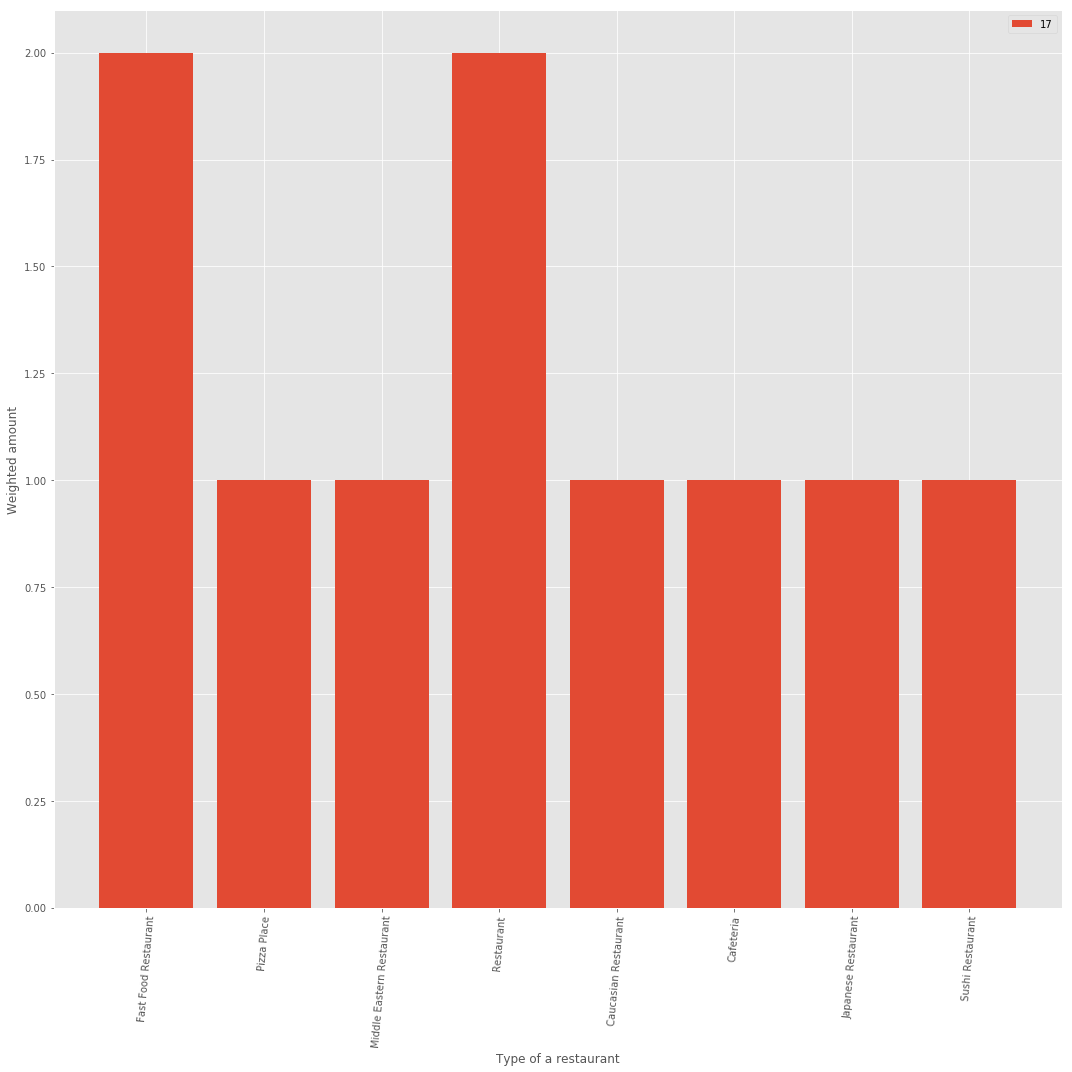

{17: 18}

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))
values = {}
i = 17 
temp = moscow_merged.loc[moscow_merged['Cluster Labels'] == i, moscow_merged.columns[list(range(4, moscow_merged.shape[1]))]]
frames = [temp['1st Most Common Venue'].value_counts(), temp['2nd Most Common Venue'].value_counts(), temp['3rd Most Common Venue'].value_counts(), temp['4th Most Common Venue'].value_counts(), temp['5th Most Common Venue'].value_counts(),
         temp['6th Most Common Venue'].value_counts(), temp['7th Most Common Venue'].value_counts(), temp['8th Most Common Venue'].value_counts(), temp['9th Most Common Venue'].value_counts(), temp['10th Most Common Venue'].value_counts()] 
temp = pd.concat(frames)
temp = pd.DataFrame(temp)
temp = pd.DataFrame(np.sort(temp.values, axis=0), index=temp.index, columns=temp.columns)
#temp.plot.bar(figsize=(30,20)).invert_xaxis()
#plt.bar(temp[0], temp, align='edge', width=-0.3, label='count1')
a = ['Pizza Place' , 'Restaurant', 'Cafe', 'Sushi Restaurant', 'Italian Restaurant', 'Caucasian Restaurant', 'Fast Food Restaurant', 'Beer Bar', 'Middle Eastern Restaurant', 'Eastern European Restaurant',
    'Bar', 'Burger Joint', 'Japanese Restaurant', 'Cafeteria', 'Gastropub', 'Russian Restaurant', 'Seafood Restaurant', 'Chinese Restaurant', 'Cocktail Bar', 'Hookah Bar', 'Vietnamese Restaurant', 'Bistro',
    'Korean Restaurant', 'Steakhouse', 'Asian Restaurant']
#temp = temp[temp[any(x in a for x in temp.index.values)]]
for b in temp.index:
    if b not in a:
        #print('NF')
        try:
            temp = temp.drop(b, axis = 0)
        except:
             continue
values[i] = temp.sum(axis = 0).iloc[0]
plt.bar(temp.index, (temp[0]), label=i)
plt.xticks(rotation=85)
plt.xlabel('Type of a restaurant')
plt.ylabel('Weighted amount')
plt.legend()
plt.tight_layout()
plt.show()
values
#plt.legend()

In [43]:
print(a)

['Pizza Place', 'Restaurant', 'Cafe', 'Sushi Restaurant', 'Italian Restaurant', 'Caucasian Restaurant', 'Fast Food Restaurant', 'Beer Bar', 'Middle Eastern Restaurant', 'Eastern European Restaurant', 'Bar', 'Burger Joint', 'Japanese Restaurant', 'Cafeteria', 'Gastropub', 'Russian Restaurant', 'Seafood Restaurant', 'Chinese Restaurant', 'Cocktail Bar', 'Hookah Bar', 'Vietnamese Restaurant', 'Bistro', 'Korean Restaurant', 'Steakhouse', 'Asian Restaurant']


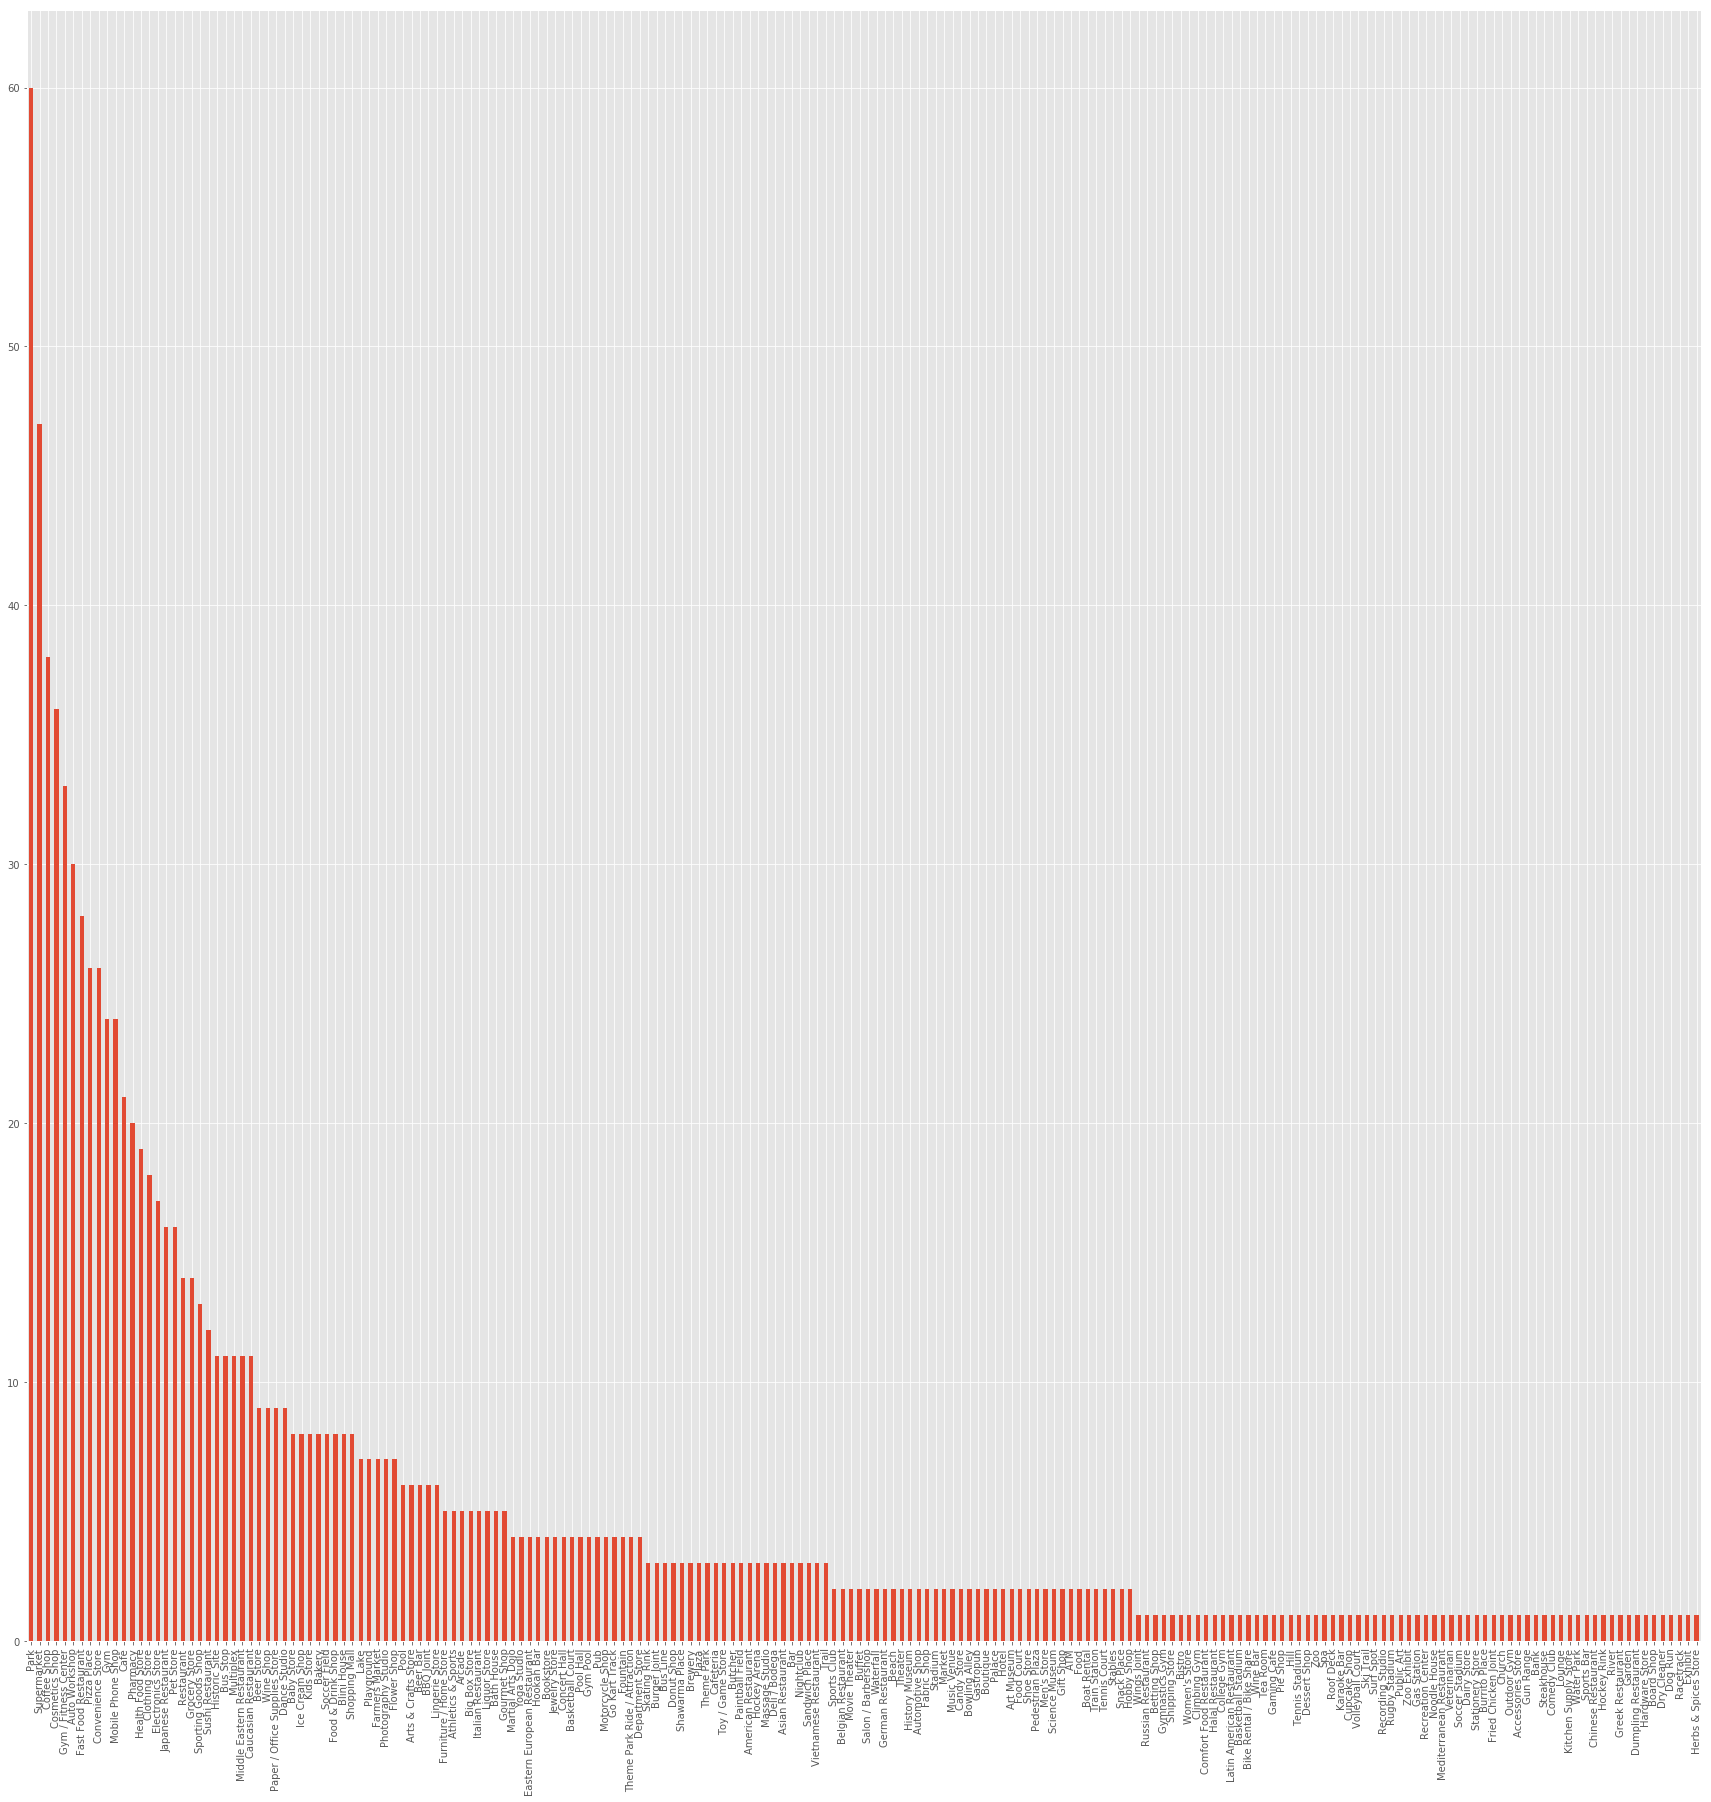

In [44]:
d17t = pd.DataFrame
d17 = pd.DataFrame
d17t = moscow_merged[moscow_merged['Cluster Labels'] == 17.0]
d17 = d17t['Name']
d17 = d17.tolist()
d17f = pd.DataFrame
d17f = moscow_venues[moscow_venues['Neighborhood'].isin(d17)]
#print(d17f.head)
d17f['Venue Category'].value_counts().plot.bar(figsize=(30, 30))

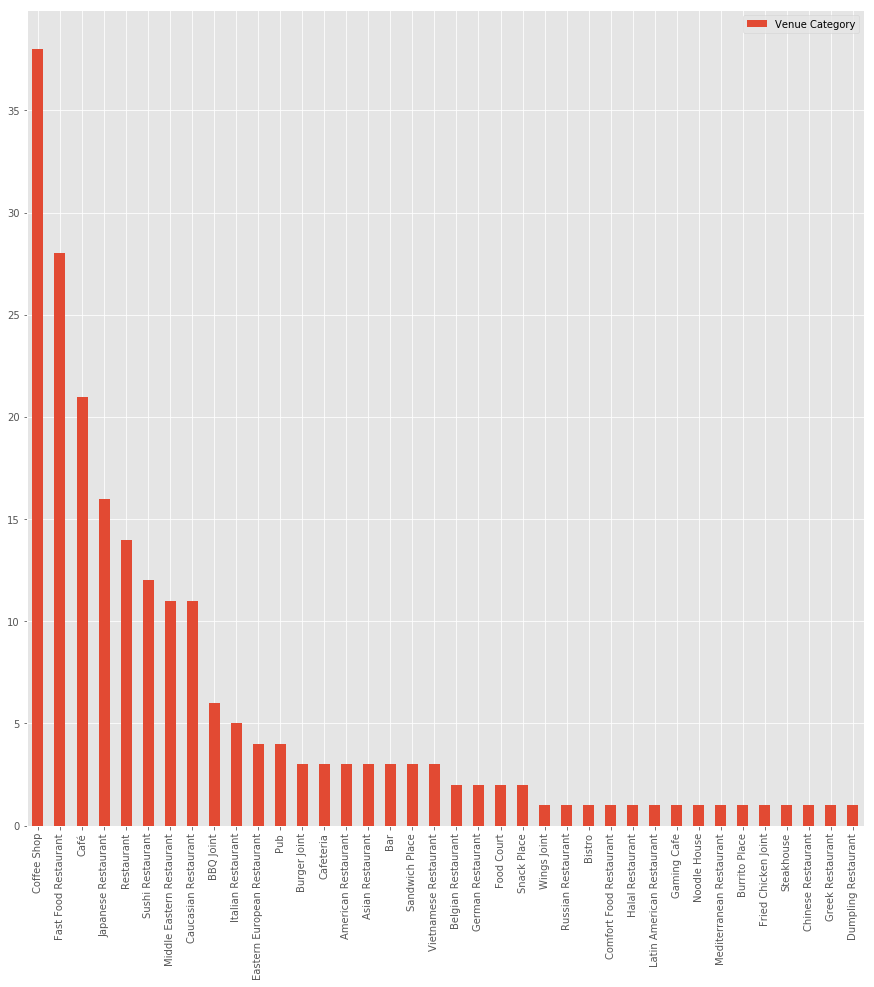

In [45]:
v = d17f['Venue Category'].value_counts()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(v)
new_a = ['Coffee Shop', 'Fast Food Restaurant', 'Pizza Place ', 'Café', 'Japanese Restaurant', 'Restaurant', 'Sushi Restaurant', 'Caucasian Restaurant', 'Middle Eastern Restaurant', 'BBQ Joint', 'Italian Restaurant'
        , 'Eastern European Restaurant', 'Pub', 'Burger Joint', 'Bar', 'Asian Restaurant', 'Sandwich Place', 'Cafeteria', 'Vietnamese Restaurant', 'American Restaurant', 'Food Court', 'German Restaurant', 'Belgian Restaurant',
        'Snack Place', 'Burrito Place', 'Comfort Food Restaurant', 'Latin American Restaurant', 'Russian Restaurant', 'Greek Restaurant', 'Wings Joint', 'Gaming Cafe', 'Mediterranean Restaurant', 'Steakhouse', 'Chinese Restaurant',
        'Dumpling Restaurant', 'Halal Restaurant', 'Bistro', 'Fried Chicken Joint', 'Noodle House']
v = v.to_frame()
v = v[v.index.isin(new_a)]
v.plot.bar(figsize=(15, 15))

In [46]:
# create map
map_17 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(moscow_merged['latitude'], moscow_merged['longitude'], moscow_merged['Name'], moscow_merged['Cluster Labels']):
    if cluster != 17.0:
        continue
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color='b',
        fill_opacity=0.7).add_to(map_17)
       
map_17